In [1]:
import optimus

In [2]:
frequency = 0.5e6  # Hz
piston_radius = 0.01  # m
location = (0, 0, 0)
velocity = 1.0
source = optimus.source.create_piston(frequency, radius=piston_radius, location=location, source_axis=(1, 0, 0),
                                      velocity=velocity, number_of_point_sources_per_wavelength=10)

In [3]:
material_ext = optimus.material.create_material(name='water-no-attenuation',
                                                density=1000,
                                                speed_of_sound=1500)

In [4]:
material_ext.print()

                 name  density  speed_of_sound  attenuation_coeff_a  attenuation_pow_b
 water-no-attenuation   1000.0          1500.0                  0.0                0.0


In [5]:
import numpy as np

In [6]:
k = material_ext.compute_wavenumber(frequency)  # m^-1
lambd = np.real(2 * np.pi / np.abs(k))  # m

In [14]:
x_offset = 0.01  # m
y_offset = 0.0  # m
zmin = 0.0
zmax = 15 * piston_radius
nz = int(zmax / lambd * 24)
x_field = x_offset * np.ones(nz)
y_field = y_offset * np.ones(nz)
z_field = np.linspace(zmin, zmax, nz)
points = np.array((np.row_stack((x_field, y_field, z_field))))

In [17]:
normals = np.zeros((3, points.shape[1]), dtype=float)
normals[0, :] = np.ones(points.shape[1], dtype=float)

In [18]:
from optimus.source.transducers import transducer_field

In [25]:
inc_field = transducer_field(source, material_ext, points, normals=normals, verbose=True)
p_inc = inc_field.pressure
u_inc = inc_field.normal_pressure_gradient / (1j * 2 * np.pi * frequency * material_ext.density)
Ix = np.real(0.25 * (p_inc * np.conj(u_inc) + np.conj(p_inc) * u_inc))

Number of point sources across element diameter: 67
Number of point sources in transducer: 3409
Parallelisation library is: numba


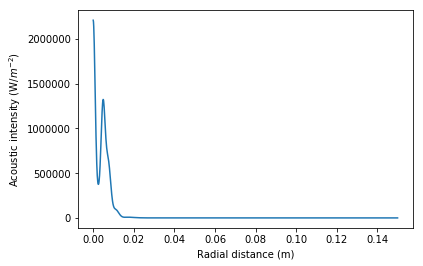

In [29]:
from matplotlib import pylab as plt
%matplotlib inline
plt.plot(points[2], Ix)
plt.xlabel('Radial distance (m)')
plt.ylabel('Acoustic intensity (W/$m^{-2}$)')
plt.show()

In [31]:
power_at_unit_velocity = 2 * np.pi * np.sum(Ix * points[2]) * points[2, 1]
print('Radiated acoustic power [W] is: ',power_at_unit_velocity, '\n when the driving velocity is 1 m/s')

Radiated acoustic power [W] is:  237.4662970782599 
 when the driving velocity is 1 m/s


In [32]:
# Required acoustic power
power_desired = 1

# Calculate velocity to produce required power
piston_velocity = np.sqrt(power_desired / power_at_unit_velocity)
print('The required piston velocity to generate ', power_desired ,
      'W of acoustic power is:\n',piston_velocity, 'm/s')

The required piston velocity to generate  1 W of acoustic power is:
 0.06489317301467962 m/s
